### **Setups**

In [1]:
# Import Necessary Libraries
from ultralytics import YOLO
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Define paths to the dataset and model
dataset = r"C:\Users\ahmed\OneDrive\Desktop\final ai project\dataset\data.yaml"
model_path = "epoch40.pt"

In [3]:
# Set up device (GPU if available)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


In [5]:
# Load the model
model = YOLO(model_path)

### **Train the Model**

In [ ]:
try:
    results = model.train(

        data=dataset,           # Path to the data.yaml file
        device=device,          # Uses GPU if available
        
        imgsz=416,              # Image size for training (can be increased for better accuracy)
        batch=32,               # Batch size (adjust based on your GPU memory)
        epochs=100,             # Number of epochs
        
        cache=True,             # Cache images to speed up training
        
        save=True,              # Save the model checkpoints during training
        save_period=5,          # Save checkpoints every 5 epochs (can adjust as needed)
        
        optimizer="SGD",        # Choose optimizer (auto is default, can specify like Adam or SGD for specific needs)
        lr0=0.01,               # Initial learning rate
        lrf=0.01,               # Final learning rate factor
        momentum=0.937,         # Momentum for SGD optimizer
        weight_decay=0.0005,    # Weight decay for regularization
        warmup_epochs=3,        # Warmup epochs to gradually increase the learning rate
        patience=100,           # Early stopping patience
        
        plots=True,             # Enable plotting of training and validation metrics
        amp=True,               # Enable automatic mixed precision for faster training
        
        resume=True             # Resuming from a checkpoint
    )
    print("Model training completed.")
except Exception as e:
    print(f"Error during training: {e}")

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/YOLO/yolo11m.pt, data=/content/Trash-Detection-14/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=5, cache=True, device=cuda, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

train: Scanning /content/Trash-Detection-14/train/labels.cache... 6000 images, 41 backgrounds, 0 corrupt: 100%|██████████| 6000/6000 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



train: Caching images (2.9GB RAM): 100%|██████████| 6000/6000 [00:09<00:00, 633.66it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Trash-Detection-14/valid/labels.cache... 673 images, 0 backgrounds, 0 corrupt: 100%|██████████| 673/673 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.3GB RAM): 100%|██████████| 673/673 [00:02<00:00, 238.18it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.69G     0.5636      0.885      1.016         46        416: 100%|██████████| 188/188 [01:49<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.66it/s]

                   all        673       1414       0.23      0.261      0.167       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.58G     0.6282     0.7348      1.035         53        416: 100%|██████████| 188/188 [01:47<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        673       1414      0.174      0.164      0.113     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.57G     0.7276     0.8288      1.096         32        416: 100%|██████████| 188/188 [01:46<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.10it/s]

                   all        673       1414     0.0716       0.17     0.0494     0.0289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.57G     0.8228     0.9287      1.157         40        416: 100%|██████████| 188/188 [01:47<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.11it/s]

                   all        673       1414      0.545     0.0738     0.0459     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.95G     0.7932     0.8664       1.14         39        416: 100%|██████████| 188/188 [01:47<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.10it/s]

                   all        673       1414      0.154      0.161      0.103     0.0693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.57G     0.7423     0.7943      1.114         53        416: 100%|██████████| 188/188 [01:48<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.55it/s]

                   all        673       1414       0.22      0.176     0.0887     0.0563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       7.7G     0.7251      0.762      1.105         43        416: 100%|██████████| 188/188 [01:47<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.07it/s]

                   all        673       1414      0.137      0.207     0.0962     0.0684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.57G       0.69     0.7318      1.088         36        416: 100%|██████████| 188/188 [01:47<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.09it/s]

                   all        673       1414      0.133      0.172       0.11     0.0796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.92G     0.6577     0.6939       1.07         45        416: 100%|██████████| 188/188 [01:46<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.10it/s]

                   all        673       1414      0.184      0.192       0.13     0.0957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.93G     0.6609     0.6829      1.062         53        416: 100%|██████████| 188/188 [01:47<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]

                   all        673       1414      0.166      0.216      0.145       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.94G     0.6278     0.6447      1.046         59        416: 100%|██████████| 188/188 [01:46<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.84it/s]

                   all        673       1414      0.243      0.261      0.155      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.57G     0.6199     0.6468      1.044         38        416: 100%|██████████| 188/188 [01:46<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.80it/s]

                   all        673       1414      0.208      0.258      0.165      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.58G     0.6146     0.6305      1.036         59        416: 100%|██████████| 188/188 [01:46<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.85it/s]

                   all        673       1414      0.255      0.233       0.16      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.57G     0.6087      0.614      1.038         39        416: 100%|██████████| 188/188 [01:46<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.80it/s]

                   all        673       1414      0.199      0.275      0.168      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.57G     0.5896      0.598      1.026         41        416: 100%|██████████| 188/188 [01:46<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.73it/s]

                   all        673       1414      0.196      0.276      0.158       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.57G     0.5827     0.5872       1.02         38        416: 100%|██████████| 188/188 [01:45<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.77it/s]

                   all        673       1414      0.267      0.297      0.181      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.57G     0.5667     0.5719      1.014         51        416: 100%|██████████| 188/188 [01:46<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.74it/s]

                   all        673       1414      0.204      0.271      0.183      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.57G     0.5608     0.5641      1.014         36        416: 100%|██████████| 188/188 [01:46<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.82it/s]

                   all        673       1414      0.236       0.28      0.186       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.71G     0.5611     0.5691      1.012         44        416: 100%|██████████| 188/188 [01:47<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]

                   all        673       1414      0.239      0.301      0.211       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.72G     0.5447     0.5492      1.006         47        416: 100%|██████████| 188/188 [01:46<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.08it/s]

                   all        673       1414      0.243      0.302      0.192      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.61G      0.533     0.5291     0.9993         56        416: 100%|██████████| 188/188 [01:46<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.12it/s]

                   all        673       1414      0.235      0.295      0.194      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.57G     0.5288     0.5231     0.9998         53        416: 100%|██████████| 188/188 [01:46<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.75it/s]

                   all        673       1414      0.245      0.308      0.182       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.57G     0.5204     0.5253     0.9947         41        416: 100%|██████████| 188/188 [01:45<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.77it/s]

                   all        673       1414      0.295      0.275      0.195      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.59G     0.5223     0.5225     0.9939         53        416: 100%|██████████| 188/188 [01:45<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.82it/s]

                   all        673       1414      0.219      0.313      0.209      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.69G     0.5147     0.5111     0.9886         56        416: 100%|██████████| 188/188 [01:46<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all        673       1414      0.286      0.323      0.236       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.57G     0.5084     0.5079      0.982         33        416: 100%|██████████| 188/188 [01:46<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.10it/s]

                   all        673       1414      0.254      0.337       0.22      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.58G     0.5009     0.4942     0.9808         37        416: 100%|██████████| 188/188 [01:47<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.11it/s]

                   all        673       1414       0.29      0.313      0.252      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.57G     0.4967     0.4852     0.9821         45        416: 100%|██████████| 188/188 [01:46<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.75it/s]

                   all        673       1414      0.287      0.315      0.248      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.59G     0.4903     0.4848     0.9786         69        416: 100%|██████████| 188/188 [01:45<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.88it/s]

                   all        673       1414      0.305      0.274       0.22      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.57G     0.4899     0.4789     0.9786         38        416: 100%|██████████| 188/188 [01:46<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.83it/s]

                   all        673       1414      0.293      0.315      0.236      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.57G     0.4915     0.4875     0.9764         48        416: 100%|██████████| 188/188 [01:46<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.08it/s]

                   all        673       1414      0.278       0.32      0.237      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.74G     0.4754     0.4605      0.973         33        416: 100%|██████████| 188/188 [01:46<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.77it/s]

                   all        673       1414      0.332      0.301       0.26      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.59G     0.4789     0.4697     0.9712         56        416: 100%|██████████| 188/188 [01:46<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.07it/s]

                   all        673       1414      0.313      0.328      0.249      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.71G     0.4679     0.4545     0.9684         36        416: 100%|██████████| 188/188 [01:45<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        673       1414      0.317       0.32      0.271      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.59G     0.4709      0.459     0.9689         35        416: 100%|██████████| 188/188 [01:46<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]

                   all        673       1414      0.327      0.334      0.265      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.57G     0.4593     0.4464      0.967         39        416: 100%|██████████| 188/188 [01:46<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.11it/s]

                   all        673       1414      0.495       0.24      0.269      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.59G     0.4688     0.4605     0.9687         43        416: 100%|██████████| 188/188 [01:46<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.09it/s]

                   all        673       1414      0.303      0.301      0.239      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.57G     0.4574     0.4448     0.9662         51        416: 100%|██████████| 188/188 [01:45<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.82it/s]

                   all        673       1414      0.362      0.302      0.266      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.57G     0.4584     0.4391     0.9648         39        416: 100%|██████████| 188/188 [01:45<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.99it/s]

                   all        673       1414      0.408      0.295      0.282       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.57G     0.4524     0.4309     0.9621         42        416: 100%|██████████| 188/188 [01:45<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.92it/s]

                   all        673       1414      0.356      0.296      0.257      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.59G     0.4542     0.4401     0.9656         47        416: 100%|██████████| 188/188 [01:46<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.06it/s]

                   all        673       1414      0.359      0.281      0.263      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.57G     0.4484     0.4273     0.9591         38        416: 100%|██████████| 188/188 [01:45<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]

                   all        673       1414      0.431      0.294      0.278      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.57G     0.4427     0.4159     0.9612         46        416: 100%|██████████| 188/188 [01:46<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.10it/s]

                   all        673       1414      0.391      0.305      0.286      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.57G     0.4457     0.4166     0.9598         51        416: 100%|██████████| 188/188 [01:46<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]

                   all        673       1414      0.331      0.331      0.288      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.52G      0.433      0.411      0.954         45        416: 100%|██████████| 188/188 [01:45<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.73it/s]

                   all        673       1414      0.414      0.316      0.307       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.57G     0.4345     0.4088      0.955         56        416: 100%|██████████| 188/188 [01:46<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.12it/s]

                   all        673       1414      0.362      0.325       0.31       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.55G     0.4379     0.4211     0.9546        101        416:  23%|██▎       | 43/188 [00:23<01:19,  1.83it/s]

### **Validate the Model**

In [5]:
results = model.val(data=dataset, device=device, imgsz=416)

Ultralytics 8.3.51  Python-3.12.4 torch-2.5.1+cu124 CPU (13th Gen Intel Core(TM) i5-13420H)
Loading epoch40.torchscript for TorchScript inference...


val: Scanning C:\Users\ahmed\OneDrive\Desktop\final ai project\dataset\valid\labels.cache... 673 images, 0 backgrounds, 0 corrupt: 100%|██████████| 673/673 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [03:32<00:00,  4.95s/it]


                   all        673       1414      0.296      0.297      0.249      0.208
                 Glass         30         48      0.188      0.367      0.187      0.169
                 Metal        149        235      0.375      0.319      0.305      0.264
                 Paper        117        166      0.307      0.175      0.211      0.169
               Plastic        460        665      0.406      0.582      0.497      0.409
                 Waste        161        300      0.204       0.04     0.0443       0.03
Speed: 1.0ms preprocess, 299.3ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs\detect\val3


### **Test the Model**


0: 416x320 1 Plastic, 113.7ms
Speed: 12.3ms preprocess, 113.7ms inference, 261.4ms postprocess per image at shape (1, 3, 416, 320)


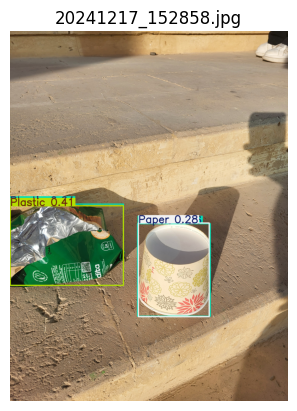


0: 320x416 (no detections), 129.5ms
Speed: 4.0ms preprocess, 129.5ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 416)


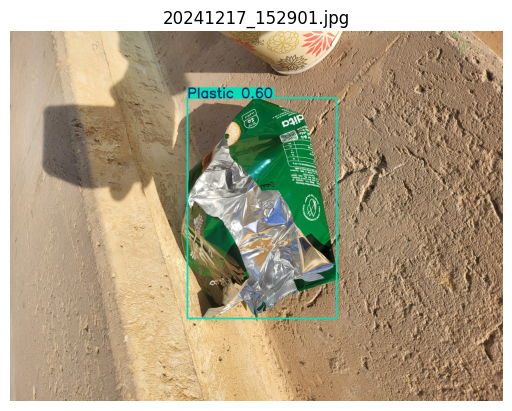


0: 416x320 2 Plastics, 53.8ms
Speed: 4.0ms preprocess, 53.8ms inference, 14.0ms postprocess per image at shape (1, 3, 416, 320)


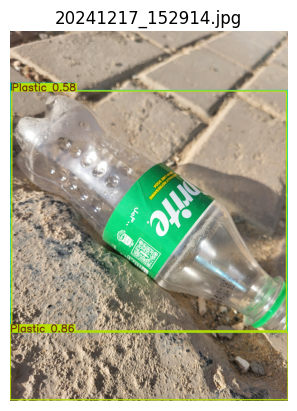


0: 416x320 (no detections), 96.6ms
Speed: 5.0ms preprocess, 96.6ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 320)


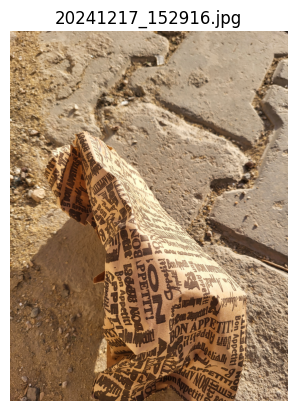


0: 416x320 1 Plastic, 105.5ms
Speed: 4.0ms preprocess, 105.5ms inference, 4.0ms postprocess per image at shape (1, 3, 416, 320)


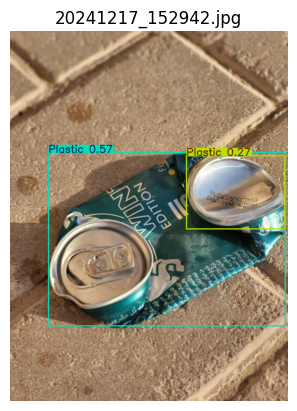


0: 416x320 (no detections), 26.0ms
Speed: 3.0ms preprocess, 26.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 320)


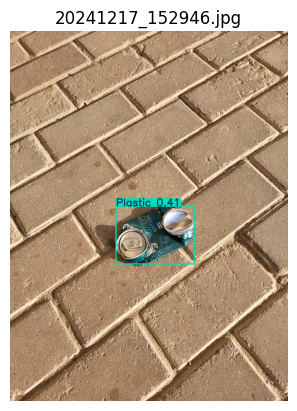


0: 416x320 1 Plastic, 29.4ms
Speed: 3.0ms preprocess, 29.4ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 320)


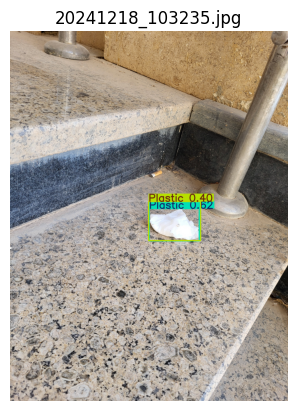


0: 416x320 (no detections), 37.2ms
Speed: 2.1ms preprocess, 37.2ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 320)


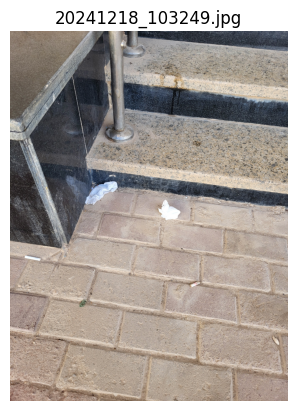


0: 416x320 1 Plastic, 45.2ms
Speed: 3.0ms preprocess, 45.2ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 320)


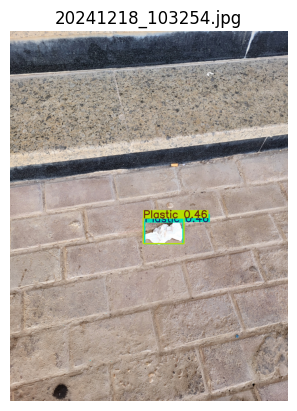


0: 416x320 1 Plastic, 51.0ms
Speed: 2.0ms preprocess, 51.0ms inference, 3.0ms postprocess per image at shape (1, 3, 416, 320)


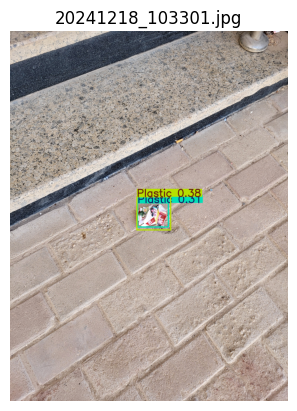


0: 416x320 (no detections), 82.8ms
Speed: 2.6ms preprocess, 82.8ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 320)


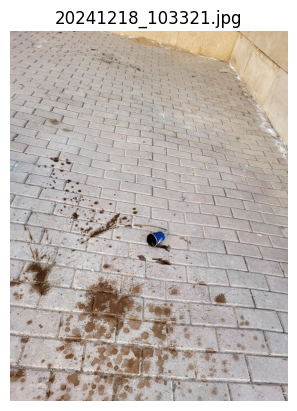


0: 416x320 (no detections), 40.0ms
Speed: 3.0ms preprocess, 40.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 320)


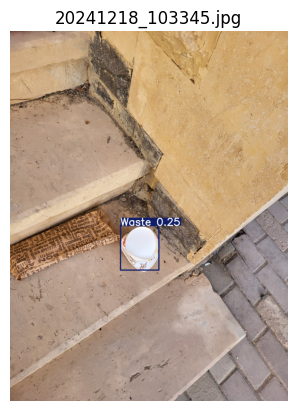


0: 416x320 1 Paper, 134.8ms
Speed: 3.0ms preprocess, 134.8ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 320)


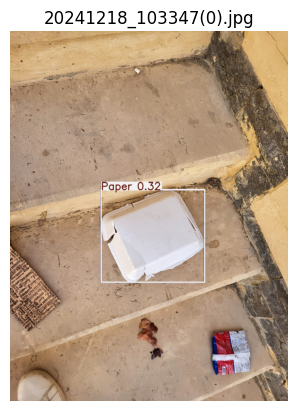


0: 416x320 (no detections), 110.8ms
Speed: 3.0ms preprocess, 110.8ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 320)


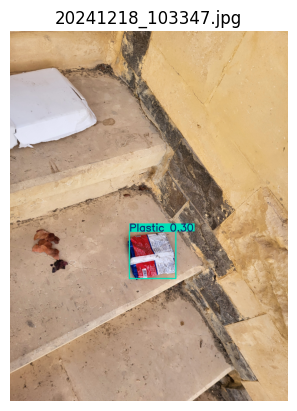


0: 416x320 1 Plastic, 19.0ms
Speed: 5.0ms preprocess, 19.0ms inference, 6.6ms postprocess per image at shape (1, 3, 416, 320)


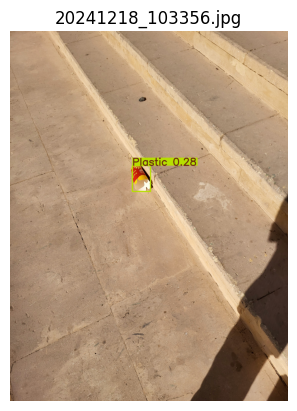

In [ ]:
# Define the folder path containing your images
folder_path = "galala_test"

# Loop through all image files in the folder
for filename in os.listdir(folder_path):
  # Check if the file is an image
  if filename.lower().endswith((".jpg", ".jpeg", ".png")):
    # Construct the full image path
    image_path = os.path.join(folder_path, filename)

    # Load the image
    frame = cv2.imread(image_path)

    # Perform inference using YOLO model with confidence threshold set to 0.25
    results = model.predict(frame, conf=0.25)

    # Annotate the frame with YOLO results
    annotated_frame = results[0].plot()

    # Display the annotated frame
    plt.imshow(annotated_frame)
    plt.title(filename)
    plt.axis('off')
    plt.show()

### **Run the Model on Webcam**

In [ ]:
# Open the default camera
cam = cv2.VideoCapture(0)
if not cam.isOpened():
    print("Error: Camera not accessible.")
    exit()

while True:
    ret, frame = cam.read()
    if not ret:
        print("Failed to grab frame")
        break

    # Perform inference using YOLO model with confidence threshold set to 0.5
    results = model.predict(frame, conf=0.5)

    # Annotate the frame with YOLO results
    annotated_frame = results[0].plot()

    # Display the processed frame
    cv2.imshow("Robot's Internal Camera", annotated_frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) == ord('q'):
        print("Exiting...")
        break

# Release the capture and close windows
cam.release()
cv2.destroyAllWindows()

### **Export the Model**

In [8]:
# Export the model to NCNN format
model.export(format="ncnn", device=device)  # creates 'yolo11n_ncnn_model'

Ultralytics 8.3.51  Python-3.12.4 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 6144MiB)

PyTorch: starting from 'epoch40.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 9, 3549) (77.0 MB)

TorchScript: starting export with torch 2.5.1+cu124...
TorchScript: export success  2.4s, saved as 'epoch40.torchscript' (77.1 MB)
requirements: Ultralytics requirement ['ncnn'] not found, attempting AutoUpdate...
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 4.0/4.0 MB 358.2 kB/s eta 0:00:00

requirements: AutoUpdate success  17.8s, installed 1 package: ['ncnn']
requirements:  Restart runtime or rerun command for updates to take effect


NCNN: starting export with NCNN 1.0.20241226...
NCNN: WARNING  PNNX not found. Attempting to download binary file from https://github.com/pnnx/pnnx/.
Note PNNX Binary file must be placed in current working directory or in C:\Users\ahmed\AppData\Roaming

100%|██████████| 16.0M/16.0M [14:48<00:00, 18.9kB/s]
Unzipping pnnx-20241223-windows.zip to C:\Users\ahmed\OneDrive\Desktop\final ai project\pnnx-20241223-windows...: 100%|██████████| 3/3 [00:00<00:00,  8.55file/s]

NCNN: running 'C:\Users\ahmed\AppData\Roaming\Python\Python312\site-packages\ultralytics\pnnx.exe epoch40.torchscript ncnnparam=epoch40_ncnn_model\model.ncnn.param ncnnbin=epoch40_ncnn_model\model.ncnn.bin ncnnpy=epoch40_ncnn_model\model_ncnn.py pnnxparam=epoch40_ncnn_model\model.pnnx.param pnnxbin=epoch40_ncnn_model\model.pnnx.bin pnnxpy=epoch40_ncnn_model\model_pnnx.py pnnxonnx=epoch40_ncnn_model\model.pnnx.onnx fp16=0 device=cuda inputshape="[1, 3, 416, 416]"'


NCNN: export success  915.1s, saved as 'epoch40_ncnn_model' (76.5 MB)

Export complete (917.8s)
Results saved to C:\Users\ahmed\OneDrive\Desktop\final ai project
Predict:         yolo predict task=detect model=epoch40_ncnn_model imgsz=416  
Validate:        yolo val task=detect model=epoch40_ncnn_model imgsz=416 data=/content/Trash-Detection-14/data.yaml  
Visualize:       https://netron.app


'epoch40_ncnn_model'